In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from tqdm import tqdm

In [3]:
stocks = pd.read_csv('data_challenge_stock_prices.csv')
stocks.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100.071213,100.149491,99.930634,99.987755,100.029963,99.946339,99.978796,99.977380,100.100539,99.925212,...,99.929276,99.956589,100.043535,100.009331,99.971643,99.967958,100.055486,100.084689,99.936694,100.059513
1,100.038755,100.167643,99.939857,100.077193,100.051333,99.946010,100.037514,100.049019,99.976980,99.905657,...,99.945678,100.006483,100.014342,100.149302,100.075814,100.050963,100.051414,100.018748,99.957900,100.030354
2,100.101553,100.279549,100.008484,100.011744,100.129126,99.942141,100.117582,100.011918,99.835479,100.033813,...,100.021618,99.982290,100.014034,100.199551,100.158617,100.091338,99.971000,100.089312,99.974230,100.006611
3,100.139363,100.325915,100.014660,99.938794,100.165624,99.837089,100.114784,100.098861,99.974006,99.984087,...,100.067053,99.986941,100.010459,100.217967,100.178327,100.089753,100.010143,100.101545,99.969835,100.022341
4,100.165794,100.255047,99.986122,99.955508,100.248478,99.717540,99.924259,99.972593,99.785835,100.023051,...,100.067643,100.022269,99.893231,100.197641,100.163919,100.061149,99.994469,100.112062,99.972424,99.941994


In [4]:
stocks.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,74.027353,88.355112,113.414610,97.924340,81.631265,82.177034,68.012391,75.602528,84.034257,125.876976,...,95.238973,117.632550,88.234457,105.849565,89.002755,77.170035,103.355877,85.131753,92.731498,95.451510
std,13.312667,7.420952,10.396755,15.030748,17.770253,6.837364,8.079138,9.660732,8.690980,18.784329,...,7.802810,15.430480,5.323075,5.784082,7.613740,9.351183,11.668750,6.281051,9.277839,3.587910
min,55.628520,76.540537,90.800955,66.444495,59.732865,70.797315,55.695000,51.874619,68.080139,93.327343,...,75.142376,91.156573,76.654274,94.314480,73.210711,62.636036,83.040066,72.672424,73.601964,86.368624
25%,63.891834,82.724212,104.750156,88.258635,67.364737,77.314822,61.905736,69.673630,76.041030,112.510824,...,89.805157,104.163454,84.112587,100.640005,83.329980,70.638101,95.242445,81.412900,85.154869,92.821700
50%,69.550432,85.911399,114.574978,100.517553,73.648946,80.905296,66.376633,75.608345,84.042454,120.098471,...,97.541573,119.979567,87.699943,106.932300,89.518453,72.690995,101.592031,84.078034,93.629275,95.782249
75%,80.960800,92.340138,120.746238,111.668880,100.770764,85.368969,72.069649,81.911841,91.504782,143.567309,...,100.847886,130.910606,91.905144,110.233219,93.913349,82.814815,110.220905,87.658344,100.547385,98.353747
max,105.644423,106.832536,137.364359,125.276255,124.456138,102.457558,100.930866,102.633134,104.841272,168.814526,...,109.208738,149.110305,103.130397,119.881742,106.590652,101.276187,132.251384,102.210868,110.073078,103.327396


In [5]:
indices = pd.read_csv('data_challenge_index_prices.csv')
indices.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,100.013939,99.990424,100.016725,100.055797,100.005678,100.005751,99.991900,99.990844,100.009374,99.962337,100.012232,99.992100,99.996137,100.021004,100.005754
1,99.975796,99.985596,100.022475,100.078519,100.013440,100.011502,100.047425,100.007369,100.016088,99.987503,100.038767,99.980429,99.993460,100.009418,100.022492
2,99.997414,99.981548,100.026134,100.065001,100.022266,100.015162,100.059273,99.994968,100.027710,100.003425,100.007231,99.990979,99.995741,100.036443,100.012029
3,100.008660,99.981617,100.020906,100.066070,100.035164,100.031895,100.013100,99.988995,100.024536,99.968714,100.021550,99.985776,99.991648,100.016424,100.006798
4,100.054803,99.975288,100.015679,100.043006,100.001001,100.026665,99.952952,99.980704,100.011436,99.982931,100.005479,99.983636,99.993578,100.020985,100.017259


In [6]:
indices.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,97.620206,98.601452,93.205287,103.431707,105.439795,128.759743,102.193411,98.368282,99.577872,102.816140,99.344988,99.389637,106.082694,99.510955,114.045277
std,4.912382,1.164900,2.271628,3.805722,4.276498,17.556875,3.151402,0.672366,0.711821,3.801826,3.890630,1.565688,2.145834,1.186845,7.391314
min,88.492842,96.308967,89.785181,92.915734,97.223141,99.690836,94.573920,96.778070,97.231306,94.809879,88.275850,95.155931,99.527166,95.826044,99.365068
25%,93.030433,97.738752,91.494619,100.960507,102.215793,114.008674,99.641789,97.887910,99.295318,99.965098,97.243751,98.375297,105.061628,98.767310,107.486553
50%,97.208233,98.619774,92.810777,104.160401,103.935820,128.008165,102.439443,98.274444,99.764098,102.846278,99.993768,99.369725,106.308539,99.535974,113.646359
75%,101.865683,99.654627,94.073770,106.188619,109.421219,143.747347,104.914788,98.825955,100.048479,105.080534,102.247950,100.235612,107.543615,100.185849,120.676728
max,107.769170,100.994502,100.625649,112.229054,114.874651,163.737934,108.418568,100.363537,100.853599,113.209205,106.462879,104.440069,111.518224,103.328429,127.758475


In [7]:
stock_returns = stocks.pct_change().dropna() * 10000

In [8]:
stock_returns.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,...,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,-0.021383,-0.009385,0.017799,0.010021,-0.003249,-0.009421,-0.021812,-0.027938,-0.007107,0.028819,...,-0.007270,0.020851,-0.000707,-0.000531,0.001155,-0.016128,0.002904,-0.009030,0.001778,-0.005850
std,7.021428,6.908555,7.073149,6.921465,8.344597,8.276061,8.350113,8.366630,8.255705,8.283900,...,5.435306,5.402804,5.497235,5.254355,5.088966,5.035762,4.993745,4.891695,4.410822,4.458482
min,-30.636064,-31.665399,-31.973885,-30.106579,-34.549138,-36.326378,-38.235562,-35.473813,-38.065853,-34.970748,...,-22.564298,-23.629280,-26.403519,-22.051445,-24.404512,-24.043284,-21.995577,-20.266209,-20.228343,-19.237760
25%,-4.765387,-4.666749,-4.752882,-4.643584,-5.610591,-5.586853,-5.664866,-5.663146,-5.588721,-5.566393,...,-3.674571,-3.607009,-3.711327,-3.565771,-3.416880,-3.402920,-3.357597,-3.301685,-2.974089,-3.023791
50%,-0.004927,-0.008825,0.014788,-0.005455,-0.007133,0.005596,0.001610,-0.009005,-0.007956,0.031481,...,-0.010081,0.018538,-0.002140,-0.011225,0.002664,0.002672,0.013723,0.004698,0.008984,-0.004851
75%,4.727321,4.658760,4.799599,4.689198,5.642385,5.554977,5.613253,5.617266,5.553862,5.608383,...,3.655950,3.652135,3.713849,3.542696,3.431295,3.367915,3.368366,3.272234,2.965818,2.990452
max,28.036696,30.246361,31.631194,28.452798,36.909432,35.993587,38.885724,37.300796,38.204518,39.146626,...,22.924742,22.937192,23.772321,24.450838,24.844336,23.039960,25.422929,24.502100,21.951976,21.724197


In [34]:
stock_trans = stock_returns.T
silhouette_avg = []
arr = range(2,25)
for i in tqdm(arr):
    kmeans = KMeans(n_clusters=i, random_state=69, init="k-means++", n_init=10)
    kmeans.fit(stock_trans)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(stock_trans, cluster_labels))









































































100%|██████████| 23/23 [03:55<00:00, 10.22s/it]


10


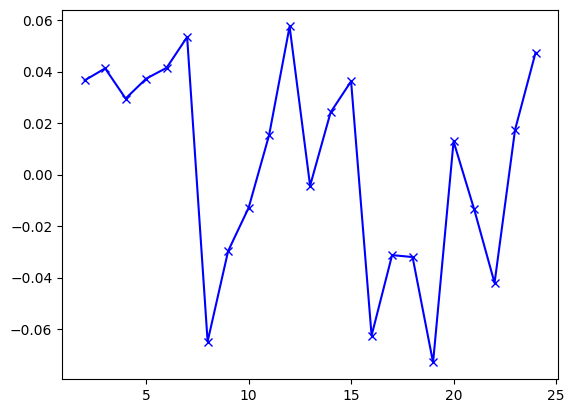

In [25]:
plt.plot(arr,silhouette_avg,'bx-')
print(silhouette_avg.index(max(silhouette_avg)))

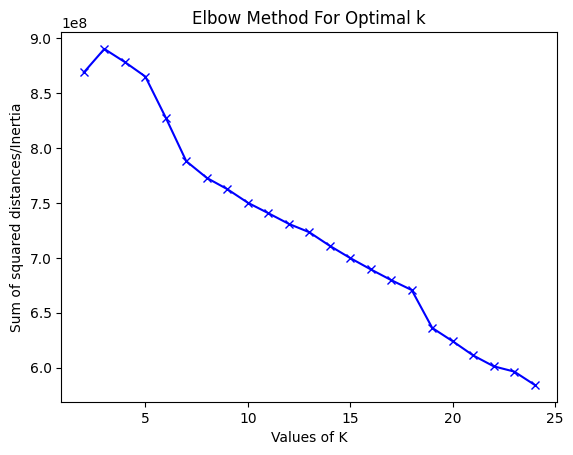

In [17]:
Sum_of_squared_distances = []
K = range(2,25)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init="auto", random_state=69)
    kmeans.fit(stock_trans)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

/var/folders/8g/jq7669xn6rj_kw3ym31khqfm0000gn/T/ipykernel_23285/1495912305.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/8g/jq7669xn6rj_kw3ym31khqfm0000gn/T/ipykernel_23285/1495912305.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/8g/jq7669xn6rj_kw3ym31khqfm0000gn/T/ipykernel_23285/1495912305.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/8g/jq7669xn6rj_kw3ym31khqfm0000gn/T/ipykernel_23285/1495912305.py:38: FutureWarning: The frame.a

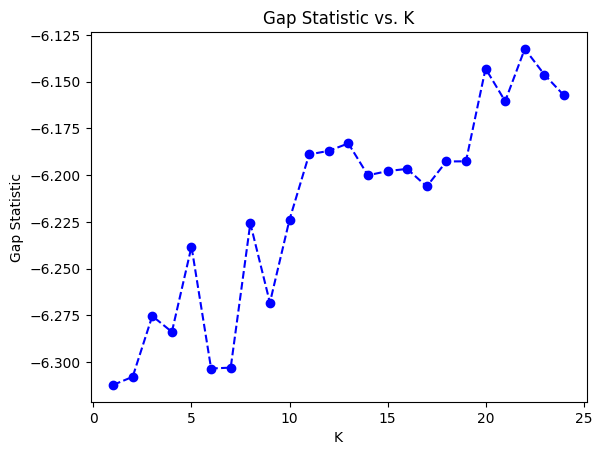

In [37]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k, n_init="auto")
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k, n_init="auto")
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(stock_trans, nrefs=5, maxClusters=25)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

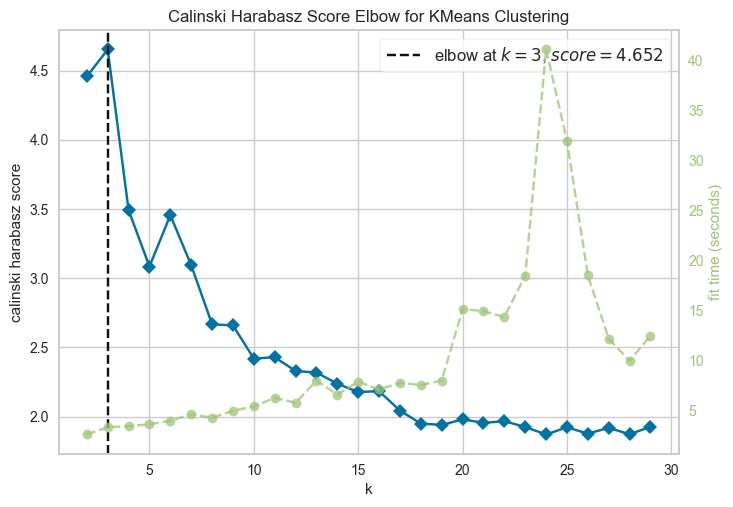

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [38]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(stock_trans)         # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure

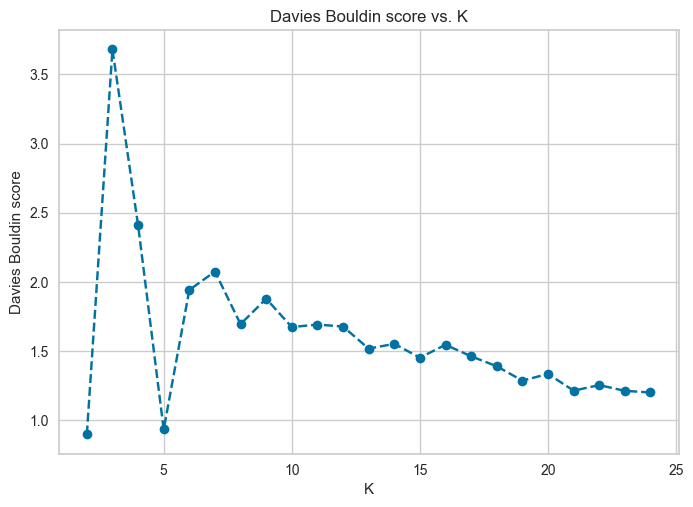

In [39]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center, n_init="auto")
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(stock_trans)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(stock_trans, model)
    
    return score
scores = []
centers = list(range(2,25))
for center in centers:
    scores.append(get_kmeans_score(stock_trans, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

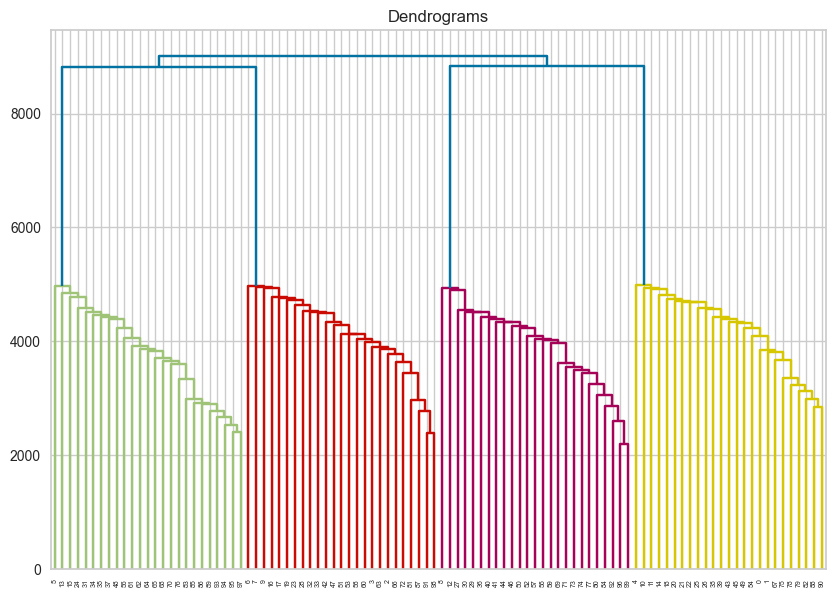

In [40]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(stock_trans, method='ward'))

In [24]:
X = np.array(stocks)
print(len(X))
y0 = np.array(indices['0'])
print(len(y0))

200000
200000


In [25]:
reg0 = LinearRegression().fit(X,y0)

In [29]:
print(list(reg0.coef_))
print(reg0.intercept_)
print(reg0.score(X,y0))

[0.07404652537797222, -0.039971831496262954, -0.0027754073705322842, 0.008356644398205722, -0.010813010612847021, 0.0015234327080748112, 0.007929645765796666, -0.04395211721407907, 0.072943564360714, 0.0017569652273556613, 0.011016248728489622, 0.03628223705562676, 0.005022625340556891, -0.013855317036809353, 0.03121418031487717, -0.02001897179862802, 0.0549405329862693, -0.015176404144360466, 0.00778576890548377, 0.01983922209924785, 0.09497049592877362, 0.01774495790777171, -0.03293261303081867, 0.03376390126633497, 0.013774685355452324, 0.028670888082045896, 0.050751520802233524, 0.043915139275425195, -0.0273329971665194, 0.03038183807051186, 0.08196581032099316, 0.023241817023580448, -0.013593735393907354, -0.02062843420965746, -0.01202945194690889, 0.0653833034035426, -0.011216364640340676, 0.027424933365048934, 0.0037152010326700208, -0.013251480449372603, -0.055404279498500755, -0.04012991767161874, 0.003058997247278303, 0.035592055913605945, -0.007484672094660673, 0.04804613230

In [30]:
from sklearn.cluster import KMeans

Xcluster = np.array(stocks.T)
print(len(Xcluster))

100


In [34]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(Xcluster)

In [36]:
kmeans.labels_

array([3, 0, 1, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 3, 4, 3, 4, 4, 2, 0, 0,
       1, 1, 4, 3, 0, 4, 4, 0, 3, 3, 3, 2, 1, 0, 0, 0, 3, 4, 3, 3, 3, 1,
       0, 1, 3, 4, 3, 2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 4, 0, 1, 3, 0,
       0, 1, 3, 3, 3, 1, 2, 1, 1, 1, 4, 0, 1, 3, 0, 3, 0, 1, 4, 4, 0, 1,
       3, 4, 0, 1, 0, 1, 0, 3, 4, 3, 4, 0])

# Chat gpt 4 solution overview
This is a complex problem that requires data analysis and implementation in Python. I will provide a high-level overview and outline of how to approach this problem using Python.

Read the data from the CSV files.
import pandas as pd

stock_prices = pd.read_csv("datachallengestockprices.csv")
index_prices = pd.read_csv("datachallengeindexprices.csv")
Compute the stock returns in basis points.
stock_returns = stock_prices.pct_change().dropna() * 10000
Cluster the stocks into sectors using a clustering algorithm, such as K-means or hierarchical clustering. This can be done using the scikit-learn library.
from sklearn.cluster import KMeans

Determine the optimal number of clusters (sectors)
Use the elbow method or silhouette score to find the optimal number of clusters (M)

Fit the KMeans model to the stock returns and obtain the partition of stocks into sectors
kmeans = KMeans(n_clusters=M, random_state=0).fit(stock_returns.T)
clusters = kmeans.labels_

### Store the set of stocks for each sector
sectors = {i: [] for i in range(M)}
for stock, sector in zip(stock_prices.columns, clusters):
    sectors[sector].append(stock)
For each index, find the sector it belongs to and the functional form of its relationship with the stocks in the sector. You can use regression techniques like linear regression, LASSO, or Ridge regression from scikit-learn.

Compute the covariance matrix of the index predictions.

### Assuming you have a DataFrame of index predictions called index_predictions
covariance_matrix = index_predictions.cov()
Construct a trading strategy using the index predictions and covariance matrix. You can use portfolio optimization techniques like the

## Chat GPT 3.5 sol overview

As an AI language model, I do not have access to the specific data files mentioned in the problem. However, I can provide a general outline of how to approach the problem using Python.

To find the number of sectors (M), we can use clustering algorithms such as k-means or hierarchical clustering on the stock prices to group them based on their similarities. The number of clusters will give us M.

Once we have the clusters, we can assign each stock to a sector and store the set of stocks for each sector in a dictionary or a list.

To solve for the indices, we can use machine learning algorithms such as linear regression or neural networks to fit the functional form given in (1) using the stock returns from each sector as input. We can then use the trained model to predict the index returns at each timestamp and compute the correlation with the actual index returns. Any index with a correlation above 40% can be considered as solved.

Once we have the predictions for the solved indices, we can compute the covariance matrix Σk×k for the predictions using the numpy library in Python.

To construct the trading strategy, we can use the predicted returns and covariance matrix to compute the optimal portfolio allocation using mean-variance optimization. We can then use the allocation to buy or short the corresponding index.

Finally, we can evaluate the performance of the trading strategy by computing the mean, standard deviation, and Sharpe ratio of the returns using the pandas library in Python. We should also discuss the assumptions and limitations of the approach, such as the assumption of conditional independence between the stock returns and the noise term in (1), the choice of clustering algorithm, and the choice of machine learning algorithm for solving the indices.

write some code fot the above too

As mentioned earlier, I do not have access to the specific data files mentioned in the problem. Therefore, I cannot provide a complete code solution. However, I can provide a general outline of how to implement the different steps in Python.

Step 1: Clustering the stocks

We can use the k-means clustering algorithm from the scikit-learn library to cluster the stocks based on their prices.

from sklearn.cluster import KMeans

#### Load the stock prices data into a pandas dataframe
df = pd.read_csv('datachallengestockprices.csv')

#### Extract the price columns and convert them to numpy arrays
prices = df.iloc[:, 1:].to_numpy()

#### Perform k-means clustering to group the stocks into sectors
kmeans = KMeans(n_clusters=M).fit(prices)

#### Retrieve the cluster labels for each stock
labels = kmeans.labels_
Step 2: Assigning stocks to sectors

We can create a dictionary to store the set of stocks for each sector based on their cluster labels.

sectors = {}
for i in range(M):
    sector_stocks = np.where(labels == i)[0]
    sectors[i] = set(sector_stocks)
Step 3: Solving for the indices

We can use machine learning algorithms such as linear regression or neural networks to fit the functional form given in (1) using the stock returns from each sector as input. We can then use the trained model to predict the index returns at each timestamp and compute the correlation with the actual index returns.

from sklearn.linear_model import LinearRegression

#### Load the index prices data into a pandas dataframe
df_indices = pd.read_csv('datachallengeindexprices.csv')

#### Iterate over the indices and solve for them
solved_indices = []
for i in range(15):
    # Extract the price column for the current index
    index_prices = df_indices.iloc[:, i+1].to_numpy()

    # Compute the returns for the index
    index_returns = np.diff(index_prices) / index_prices[:-1]

    # Iterate over the sectors and fit a linear regression model for each sector
    for j in range(M):
        # Extract the stock prices for the current sector
        sector_prices = prices[:, list(sectors[j])]

        # Compute the returns for the sector
        sector_returns = np.diff(sector_prices, axis=1) / sector_prices[:, :-1]

        # Fit a linear regression model to predict the index returns using the sector returns
        model = LinearRegression().fit(sector_returns.T, index_returns)

        # Compute the predicted index returns using the trained model
        predicted_returns = model.predict(sector_returns.T)

        # Compute the correlation between the predicted and actual index returns
        correlation = np.corrcoef(predicted_returns, index_returns)[0, 1]

        # If the correlation is above 0.4, we consider the index as solved
        if correlation > 0.4:
            solved_indices.append((i, j, model))
Step 4: Computing the covariance matrix for the predictions

We can use the numpy library to compute the covariance matrix Σk×k for the predicted index returns.

#### Compute the predicted index returns for the solved indices
predicted_returns = []
for i in range(len(solved_indices)):
    index, sector, model = solved_indices[i]
    sector_prices = prices[:, list(sectors[sector])]
    sector_returns = np.diff(sector_prices, axis=1) / sector_prices[:, :-1]
    predicted_returns.append(model.predict(sector_returns.T))

#### Compute the covariance matrix for the predicted index returns
covariance_matrix = np.cov(predicted_returns)
Step 5: Constructing the trading strategy

We can use the predicted returns and covariance matrix to compute the optimal portfolio allocation using mean-variance optimization. We can then use the allocation to buy or short the corresponding index.

#### Compute the optimal portfolio allocation using mean-variance optimization
from scipy.optimize import minimize

def objective(weights):
    return np.dot(weights.T, predicted_returns.mean(axis=1)) - 0.5 * np.dot(weights.T, np.dot(covariance_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
               {'type': 'ineq', 'fun': lambda x: 1 - np.sum(np.abs(x))})

initial_weights = np.zeros(len(solved_indices))
result = minimize(objective, initial_weights, method='SLSQP', constraints=constraints)
weights = result.x

#### Buy or short the corresponding index based on the allocated weight
for i in range(len(solved_indices)):
    index, sector, model = solved_indices[i]
    allocation = weights[i]
    # Buy or short the corresponding index based on the allocated weight
    # ...
Step 6: Evaluating the performance of the trading strategy


Sure! Here are some more details about the different steps in the solution:

Step 1: Clustering the stocks

In this step, we use the k-means clustering algorithm to group the stocks into different sectors based on their prices. The idea is to group stocks that have similar price movements and may belong to the same industry or sector. We use the scikit-learn library in Python to perform k-means clustering on the stock prices.

Step 2: Assigning stocks to sectors

Once we have the clusters, we assign each stock to a sector based on its cluster label. We create a dictionary to store the set of stocks for each sector. This step is useful because it allows us to speed up the next step where we solve for the indices by only using the stock returns from the relevant sector.

Step 3: Solving for the indices

In this step, we solve for the indices using machine learning algorithms such as linear regression or neural networks. We use the functional form given in (1) to model the relationship between the index returns and the stock returns from the relevant sector. We fit a separate model for each sector and each index. We then use the trained model to predict the index returns at each timestamp and compute the correlation with the actual index returns. Any index with a correlation above 40% is considered as solved.

Step 4: Computing the covariance matrix for the predictions

Once we have the predicted index returns for the solved indices, we compute the covariance matrix Σk×k for the predictions using the numpy library in Python. The covariance matrix gives us an estimate of the uncertainty or risk associated with the predictions.

Step 5: Constructing the trading strategy

In this step, we use the predicted index returns and covariance matrix to compute the optimal portfolio allocation using mean-variance optimization. We aim to find a portfolio allocation that maximizes the expected return while minimizing the risk. We use the scipy library in Python to perform the optimization. Once we have the optimal portfolio allocation, we can buy or short the corresponding index based on the allocated weight.

Step 6: Evaluating the performance of the trading strategy

In the final step, we evaluate the performance of the trading strategy by computing the mean, standard deviation, and Sharpe ratio of the returns. The Sharpe ratio is a measure of the risk-adjusted return and gives us an idea of how much return we are getting for the amount of risk we are taking. We can use the pandas library in Python to compute these statistics.

Overall, the solution involves a combination of clustering, machine learning, optimization, and statistical analysis to solve the problem of predicting and trading indices based on stock prices.